In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
import re
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [3]:
df = pd.read_csv('googleplaystore.csv')

In [4]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7991,The CW TN app 2018,FAMILY,2.2,54,4.3M,"10,000+",Free,0,Everyone,Entertainment,"April 30, 2018",1.0,3.2 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


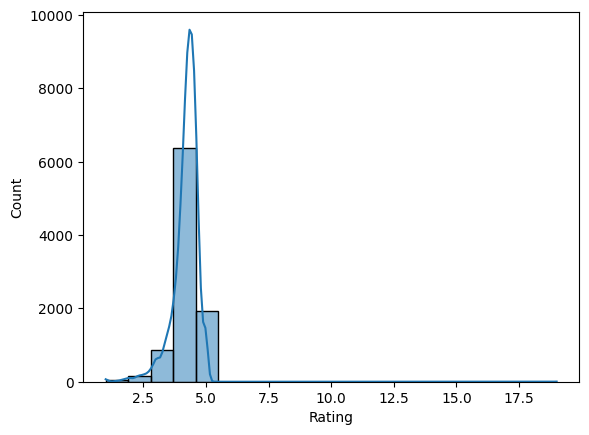

In [6]:
sns.histplot(data=df, x='Rating', bins=20, kde=True)
plt.show()

In [7]:
df["Rating"] = df["Rating"].clip(0, 5)

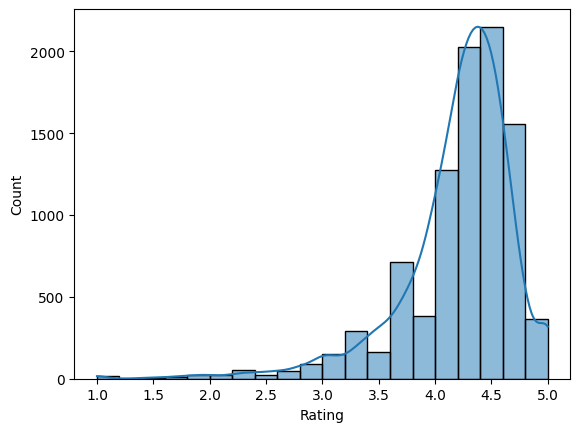

In [8]:
sns.histplot(data=df, x='Rating', bins=20, kde=True)
plt.show()

In [9]:
df['Rating'].isnull().sum()

np.int64(1474)

In [10]:
# pd.value_counts(df["Category"])

# df["Category"].nunique()

pd.unique(df["Category"])

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

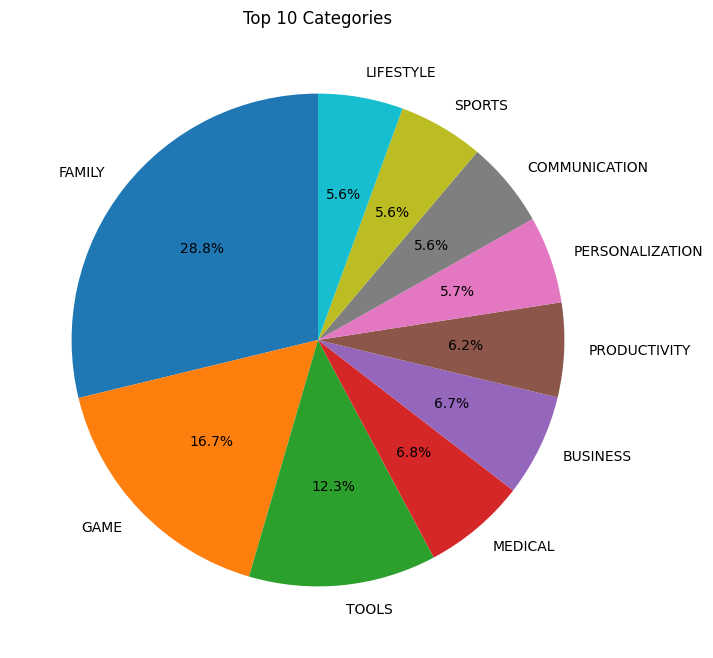

In [11]:
category_counts = df["Category"].value_counts()

# plt.figure(figsize=(10,10))
# plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title("Distribution of Apps by Category")
# plt.show()

top10 = category_counts.head(10)

plt.figure(figsize=(8,8))
plt.pie(top10, labels=top10.index, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Categories")
plt.show()

In [12]:
df[df["Category"] == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,5.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
df.loc[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame", "Category"] = "PHOTOGRAPHY"
df.loc[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame", "Rating"] = 1.9

df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
df.duplicated().sum()

np.int64(483)

In [15]:
duplicates = df["App"].value_counts()
duplicates[duplicates > 1].sum()

np.int64(1979)

In [16]:
df = df.sort_values("Reviews", ascending=False).drop_duplicates(subset=["App"], keep="first")


In [17]:
df['Size'].value_counts()

Size
Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
73k                      1
874k                     1
980k                     1
91k                      1
784k                     1
Name: count, Length: 462, dtype: int64

In [18]:
def size_to_mb(size):
    if size == "Varies with device":
        return np.nan
    elif isinstance(size, str):
        size = size.strip()
        if size.endswith("M"):
            return float(size[:-1])
        elif size.endswith("k"):
            return float(size[:-1]) / 1024
    return np.nan

df["Size_MB"] = df["Size"].apply(size_to_mb)

In [19]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2203
4.0.3 and up          1394
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             617
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             230
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [20]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1055
1.0                    798
1.1                    260
1.2                    176
2.0                    149
                      ... 
1.98                     1
13.3                     1
v5.4.3                   1
3.1 Release b2           1
1.2.0.200                1
Name: count, Length: 2819, dtype: int64

In [21]:
def clean_ver(x):
    if x == "Varies with device" or pd.isna(x):
        return np.nan
    match = re.match(r"(\d+(\.\d+)?)", x)
    if match:
        return float(match.group(1))
    return np.nan

df["Android_Ver"] = df["Android Ver"].apply(clean_ver)

df["Current_Ver"] = df["Current Ver"].apply(clean_ver)

In [22]:
df['Content Rating'].value_counts()

Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [23]:
pd.unique(df["Price"])

array(['0', '$2.49', '$2.99', '$0.99', '$3.99', '$4.99', '$399.99',
       '$1.99', '$79.99', '$7.49', '$4.49', '$9.99', '$5.99', '$13.99',
       '$4.29', '$1.70', '$14.99', '$12.99', '$1.49', '$19.99', '$1.50',
       '$3.49', '$1.29', '$7.99', '$29.99', '$1.59', '$11.99', '$39.99',
       '$89.99', '$3.02', '$6.99', '$2.90', '$1.00', '$19.40', '$5.49',
       '$1.75', '$8.99', '$5.00', '$3.08', '$18.99', '$299.99', '$17.99',
       '$379.99', '$8.49', '$2.56', '$15.46', '$2.95', '$1.97',
       'Everyone', '$2.60', '$19.90', '$1.26', '$4.80', '$24.99', '$4.77',
       '$400.00', '$16.99', '$10.99', '$4.59', '$389.99', '$33.99',
       '$46.99', '$1.76', '$3.90', '$2.00', '$2.50', '$10.00', '$14.00',
       '$3.95', '$6.49', '$3.28', '$1.20', '$2.59', '$4.84', '$37.99',
       '$1.61', '$4.60', '$9.00', '$15.99', '$74.99', '$3.88', '$4.85',
       '$3.04', '$1.04', '$154.99', '$28.99', '$109.99', '$30.99',
       '$3.61', '$394.99', '$1.96', '$200.00', '$25.99'], dtype=object)

In [24]:
def remove_DS(x):
    if x == "0" :
        return 0.0
    elif x[0] == '$' :
        return float( x[1:] )

df["Price"] = df["Price"].apply(remove_DS)

In [25]:
df = df.drop(columns=["Type"])

In [26]:
pd.unique(df["Installs"])

array(['1,000,000+', '100,000+', '500,000+', '50,000+', '10,000,000+',
       '5,000,000+', '10,000+', '50,000,000+', '100,000,000+', '5,000+',
       '1,000+', '1,000,000,000+', '500+', '10+', '100+', '50+',
       '500,000,000+', '5+', '1+', 'Free', '0+', '0'], dtype=object)

In [27]:
def clean_installs(x):
    if x in ["Free", np.nan]:
        return np.nan
    x = x.replace("+", "").replace(",", "")
    try:
        return int(x)
    except:
        return np.nan

df["Installs"] = df["Installs"].apply(clean_installs)

In [28]:
pd.unique(df["Content Rating"])

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', nan, 'Unrated'], dtype=object)

In [29]:
df["Content Rating"] = df["Content Rating"].replace(np.nan, df["Content Rating"].mode()[0])

In [30]:
pd.unique(df["Content Rating"])

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [31]:
df.drop(columns=["Size", "Current Ver", "Android Ver"], inplace=True)


In [32]:
df["Current_Ver"].fillna(df["Current_Ver"].median(), inplace=True)

df["Android_Ver"].fillna(df["Android_Ver"].median(), inplace=True)

C:\Users\Anas\AppData\Local\Temp\ipykernel_17920\3004588377.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Current_Ver"].fillna(df["Current_Ver"].median(), inplace=True)
C:\Users\Anas\AppData\Local\Temp\ipykernel_17920\3004588377.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [33]:
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce").astype(float)

In [34]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

imputer = KNNImputer(n_neighbors=4)
df[num_cols] = imputer.fit_transform(df[num_cols])


In [35]:
df.sample()

,App,Category,Rating,Reviews,Installs,Price,Content Rating,Genres,Last Updated,Size_MB,Android_Ver,Current_Ver
8482,Fodbold DK Pro,SPORTS,4.6,315.0,1000.0,2.99,Everyone,Sports,"June 6, 2018",4.3,4.0,2.106


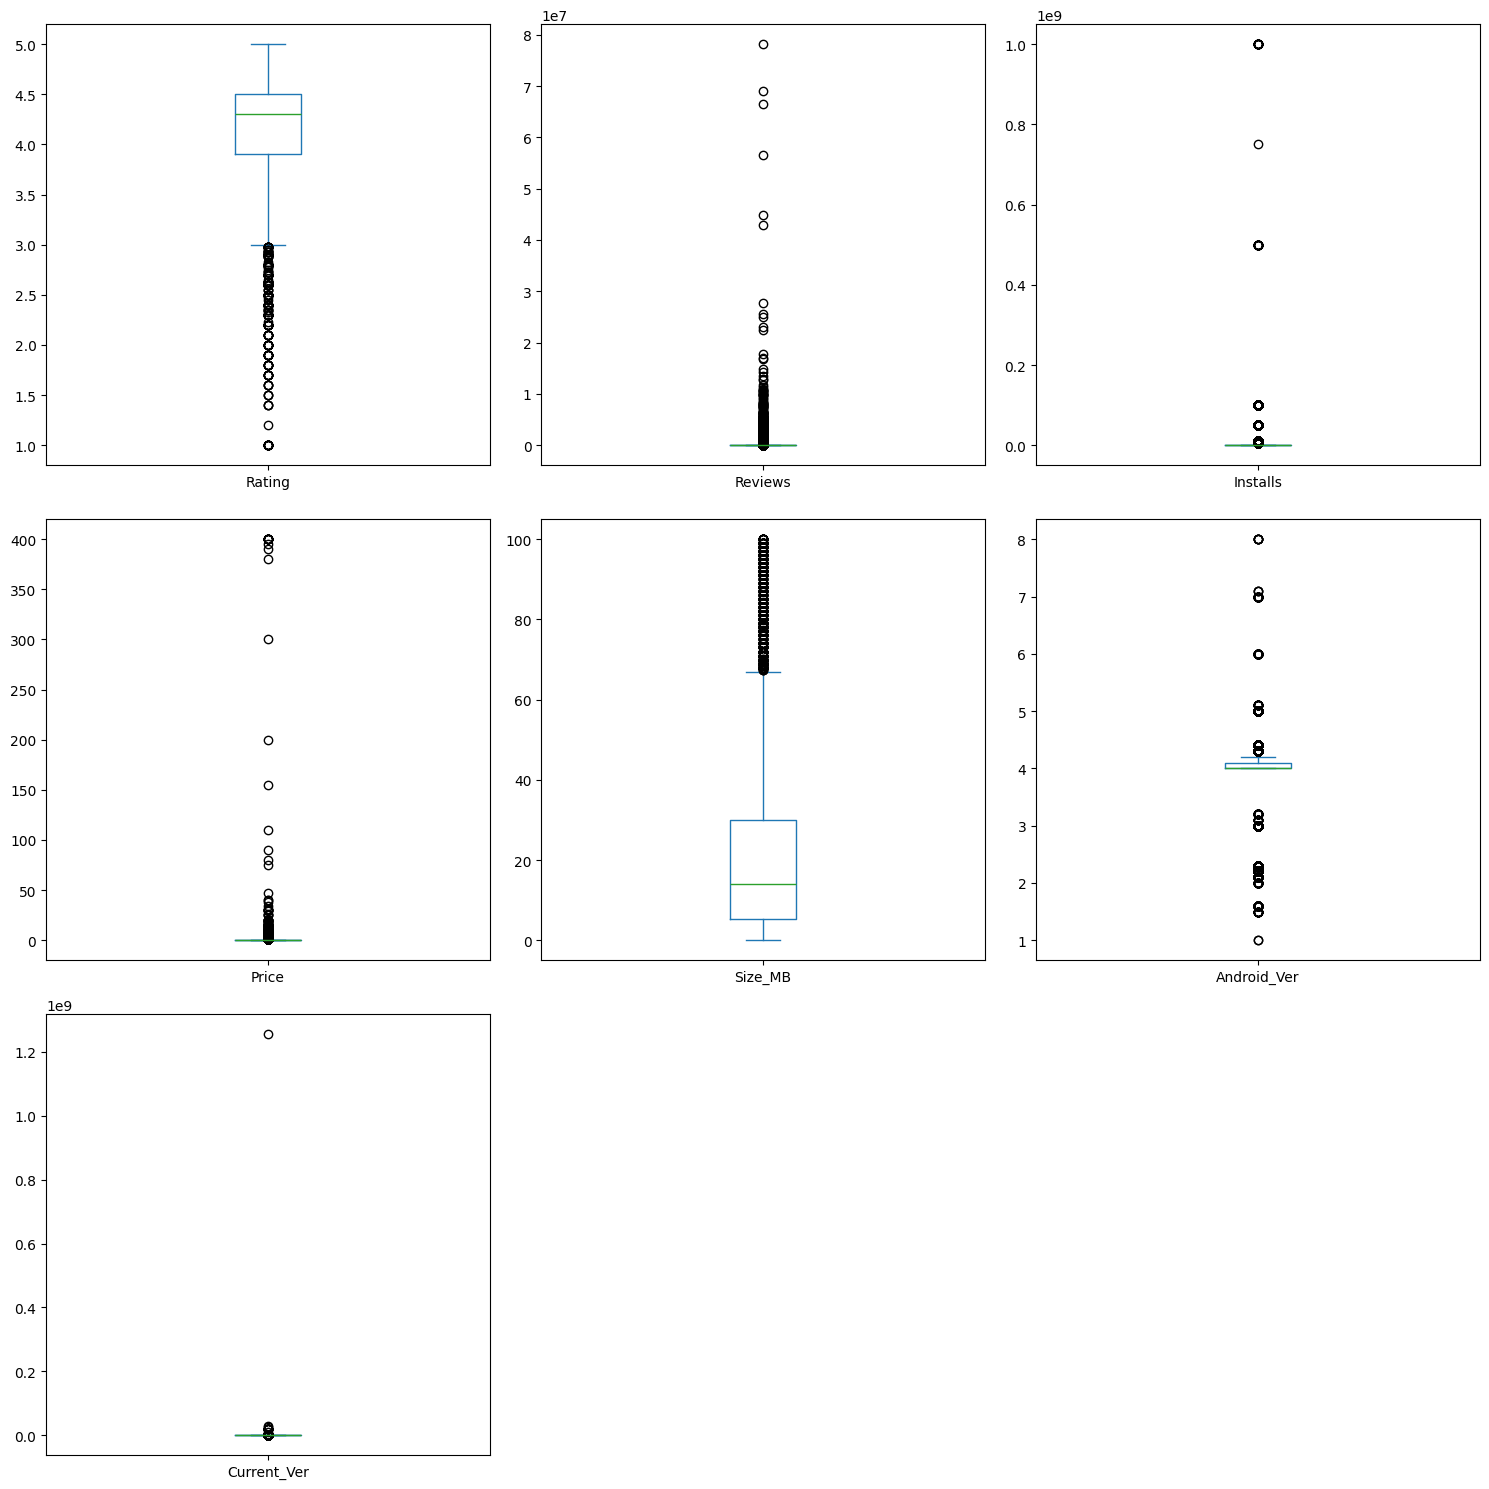

In [36]:
cols = ['Rating','Reviews','Installs','Price','Size_MB','Android_Ver','Current_Ver']

df[cols].plot(
    kind='box',
    subplots=True,
    layout=(len(cols)//3 + 1, 3),
    figsize=(15, 15),
    sharex=False,
    sharey=False
)

plt.tight_layout()
plt.show()


In [37]:
df["Reviews_log"] = np.log1p(df["Reviews"])
df["Installs_log"] = np.log1p(df["Installs"])
df["Price_log"] = np.log1p(df["Price"])
df["Android_Ver_log"] = np.log1p(df["Android_Ver"])
df["Current_Ver_log"] = np.log1p(df["Current_Ver"])

In [38]:
df.loc[df["Rating"] < 2.65, "Rating"] = 2.65

In [39]:
Q1 = df["Size_MB"].quantile(0.25)
Q3 = df["Size_MB"].quantile(0.85)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df.loc[(df["Size_MB"] < lower_bound) | (df["Size_MB"] > upper_bound), "Size_MB"] = np.nan


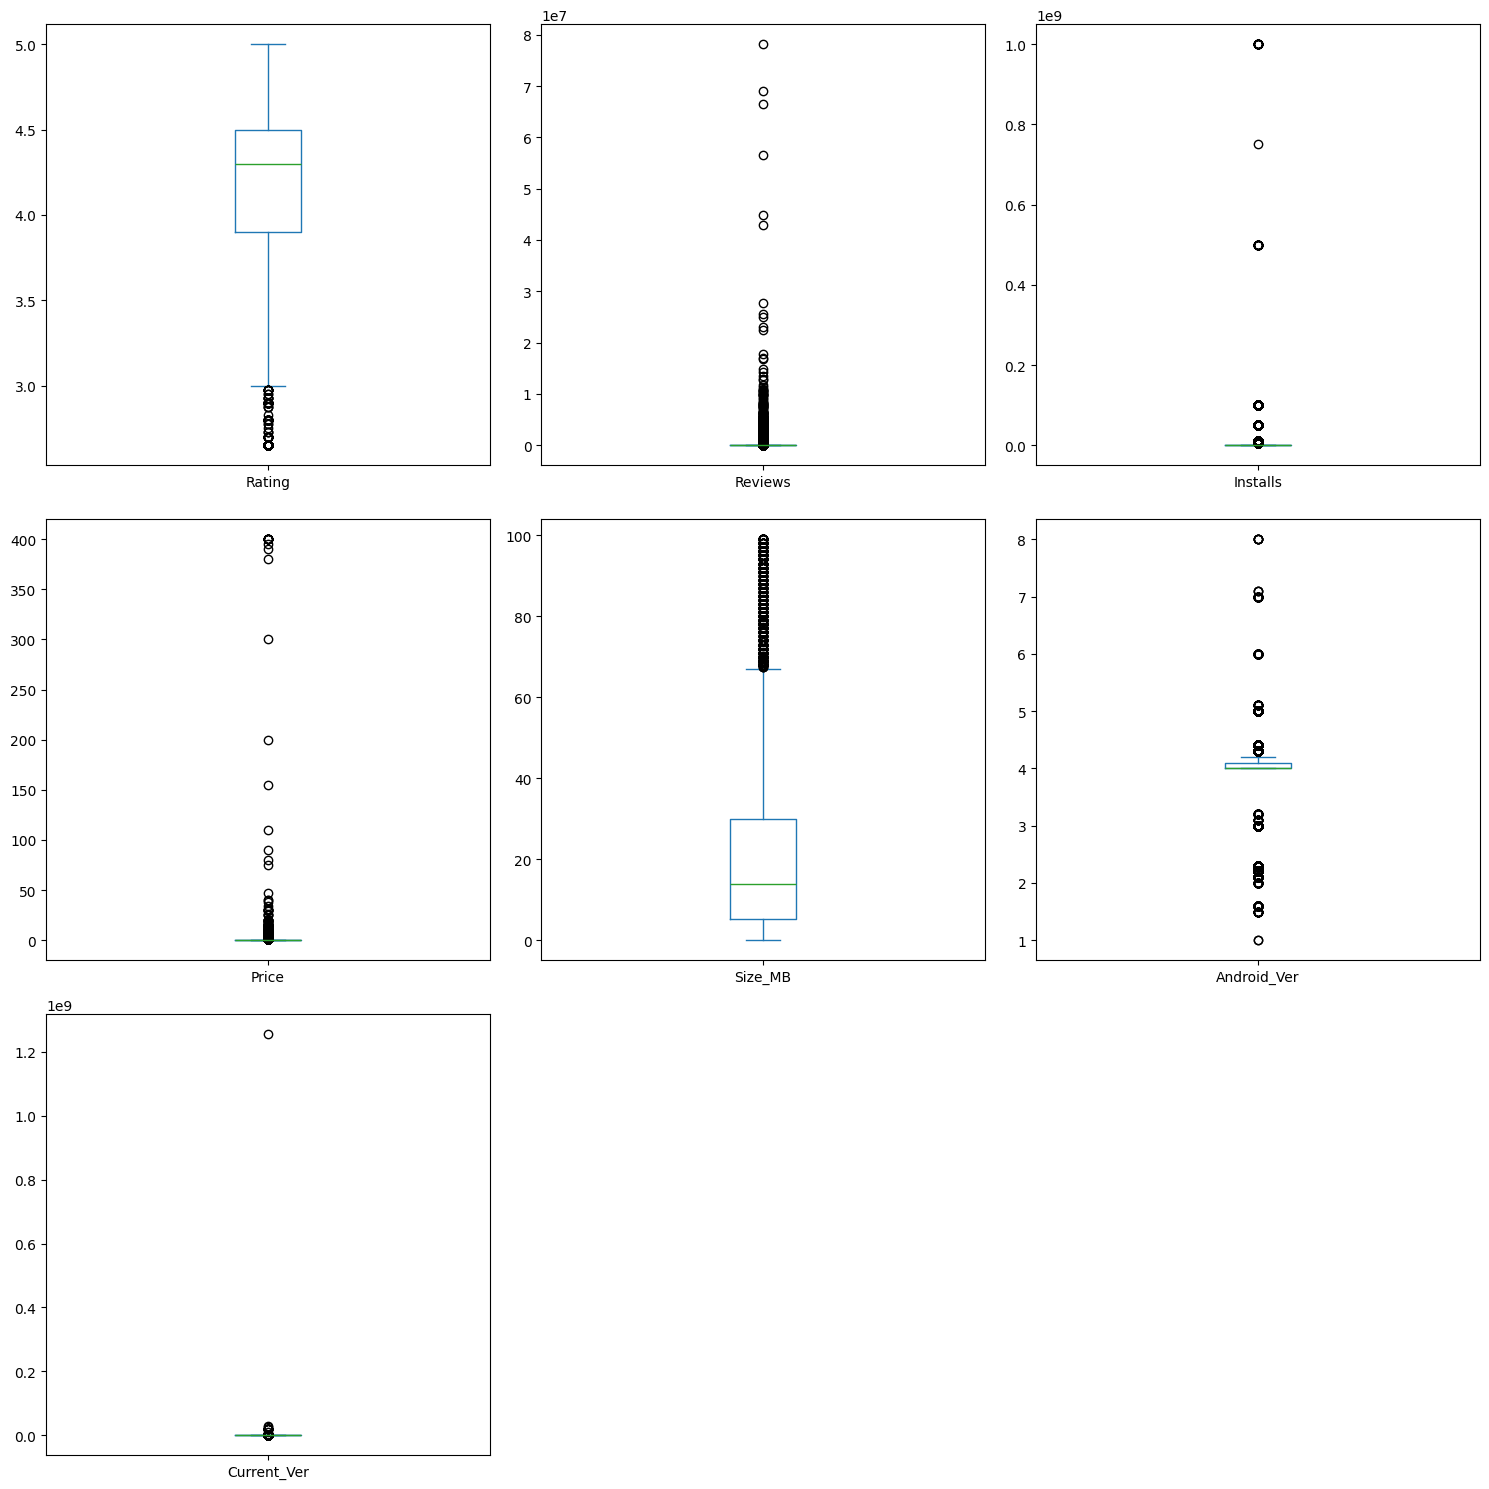

In [40]:
cols = ['Rating','Reviews','Installs','Price','Size_MB','Android_Ver','Current_Ver']

df[cols].plot(
    kind='box',
    subplots=True,
    layout=(len(cols)//3 + 1, 3),
    figsize=(15, 15),
    sharex=False,
    sharey=False
)

plt.tight_layout()
plt.show()


# **Analytical Questions**

### 1) Most expensive app

In [41]:
df.loc[df['Price'].idxmax(), ['App','Price']]

App      I'm Rich - Trump Edition
Price                       400.0
Name: 4367, dtype: object

### 2) Genre with most apps

In [42]:
df['Genres'].value_counts().head(1)

Genres
Tools    827
Name: count, dtype: int64

### 3) Avg size (MB) Free vs Paid

In [43]:
df['App_Type'] = df['Price'].apply(lambda x: 'Paid' if x > 0 else 'Free')
df.groupby('App_Type')['Size_MB'].mean()

App_Type
Free    21.514818
Paid    19.128293
Name: Size_MB, dtype: float64

### 4) Top 5 most expensive apps with rating=5

In [44]:
df[df['Rating'] == 5].sort_values(by='Price',ascending=False).head(5)[['App','Price','Rating']]

,App,Price,Rating
5489,AP Art History Flashcards,29.99,5.0
7477,USMLE Step 2 CK Flashcards,19.99,5.0
7204,TI-84 CE Graphing Calculator Manual TI 84,4.99,5.0
5482,meStudying: AP English Lit,4.99,5.0
5246,Hey AJ! It's Bedtime!,4.99,5.0


### 5) Apps with >50K reviews

In [45]:
(df['Reviews'] > 50_000).sum()

np.int64(1945)

### 6) Avg price by genre & installs (head)

In [46]:
df.groupby(["Genres", "Installs"])["Price"].mean().reset_index(name="Avg_Price").sort_values("Avg_Price", ascending=False).head(10)

,Genres,Installs,Avg_Price
504,Lifestyle,0.0,399.990000
427,Finance,0.0,212.990000
539,Medical,0.0,200.000000
639,Productivity,0.0,154.990000
414,Events,1.0,109.990000
434,Finance,5000.0,36.362727
433,Finance,1000.0,30.148750
513,Lifestyle,10000.0,28.473333
436,Finance,50000.0,22.221667
387,Entertainment,5000.0,13.382667


In [47]:
f7 = df[df['Rating'] > 4.7]
q7_count = len(f7)
q7_avg_price = f7['Price'].mean()

### 7) Apps rating >4.7 count: 

In [48]:
q7_count

815

### 7) avg price:

In [49]:
q7_avg_price

np.float64(0.35814723926380365)

### 8) Estimated Google revenue (30%) for installs >=5,000,000 (paid only)

In [50]:
x = df[(df['Installs'] >= 5_000_000) & (df['Price'] > 0)]
xx= x['Price'] * x['Installs'] * 0.30
xx.sum()

np.float64(23940000.0)

### 9) Min/Max size (MB) Free vs Paid:

In [51]:
df.groupby(df['Price'].gt(0).map({True:'Paid', False:'Free'}))['Size_MB'].agg(['min','max'])

,min,max
Price,,
Free,0.008301,99.0
Paid,0.013672,99.0


### 10) Correlation matrix

In [52]:
df[['Rating','Reviews','Size_MB','Price']].corr()

,Rating,Reviews,Size_MB,Price
Rating,1.000000,0.054116,0.054640,-0.027361
Reviews,0.054116,1.000000,0.151228,-0.007616
Size_MB,0.054640,0.151228,1.000000,-0.024738
Price,-0.027361,-0.007616,-0.024738,1.000000


### 11) Count by Content Rating x Type

In [53]:
type_col = 'Type' if 'Type' in df.columns else 'App_Type'
df.groupby(['Content Rating', type_col]).size().reset_index(name='count')

,Content Rating,App_Type,count
0,Adults only 18+,Free,3
1,Everyone,Free,7249
2,Everyone,Paid,655
3,Everyone 10+,Free,291
4,Everyone 10+,Paid,31
5,Mature 17+,Free,375
6,Mature 17+,Paid,18
7,Teen,Free,984
8,Teen,Paid,52
9,Unrated,Free,2


### 12) Apps compatible with Android 4.x

In [54]:
df.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Installs            0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Size_MB            14
Android_Ver         0
Current_Ver         0
Reviews_log         0
Installs_log        0
Price_log           0
Android_Ver_log     0
Current_Ver_log     0
App_Type            0
dtype: int64

In [55]:
((df['Android_Ver'] >= 4.0) & (df['Android_Ver'] < 5.0)).sum()

np.int64(7300)

# ML

In [56]:
features = ['Rating', 'Reviews', 'Installs', 'Price', 'Size_MB']
X = df[features].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means Evaluation:
Silhouette Score: 0.8901857961336351
Davies-Bouldin Index: 0.6044301544226325
Calinski-Harabasz Score: 3436.7068578711587


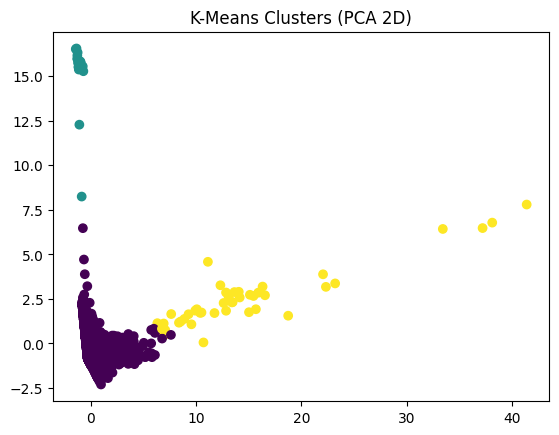

In [59]:
kmeans = KMeans(n_clusters=3, n_init=100, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

print("K-Means Evaluation:")
print("Silhouette Score:", silhouette_score(X_scaled, labels_kmeans))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, labels_kmeans))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, labels_kmeans))

pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.scatter(reduced[:, 0], reduced[:, 1], c=labels_kmeans, cmap='viridis')
plt.title("K-Means Clusters (PCA 2D)")
plt.show()

In [ ]:

eps_values = np.arange(0.3, 5.1, 0.3)
min_samples_values = [3, 5, 10, 15]

best_score = -1
best_params = None

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_scaled)
        
        unique_labels = set(labels)
        if len(unique_labels - {-1}) > 1:  
            score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
            if score > best_score:
                best_score = score
                best_params = (eps, ms)

if best_params:
    print("Best DBSCAN params:", best_params, "with Silhouette Score:", best_score)
else:
    print("No suitable DBSCAN parameters found.")

Best DBSCAN params: (np.float64(1.5), 15) with Silhouette Score: 0.9245390888353646


DBSCAN Evaluation (without noise):
Silhouette Score: 0.9245390888353646
Davies-Bouldin Index: 0.08627127717846725
Calinski-Harabasz Score: 3831.3504313285257


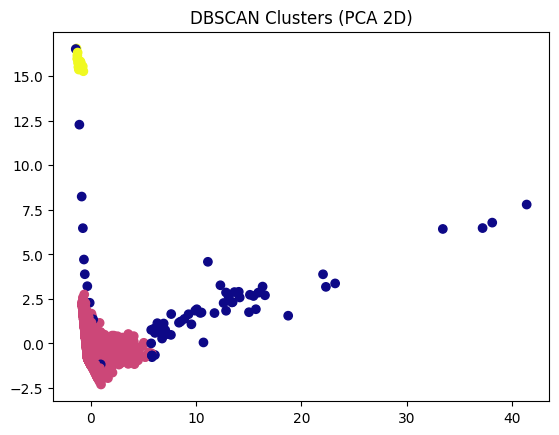

In [60]:
# Train DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=15)
labels_dbscan = dbscan.fit_predict(X_scaled)

mask = labels_dbscan != -1
filtered_data = X_scaled[mask]
filtered_labels = labels_dbscan[mask]

if len(set(filtered_labels)) > 1:
    print("DBSCAN Evaluation (without noise):")
    print("Silhouette Score:", silhouette_score(filtered_data, filtered_labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(filtered_data, filtered_labels))
    print("Calinski-Harabasz Score:", calinski_harabasz_score(filtered_data, filtered_labels))
else:
    print("DBSCAN: Only one cluster found (or all noise).")

# Visualization
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels_dbscan, cmap='plasma')
plt.title("DBSCAN Clusters (PCA 2D)")
plt.show()


In [61]:
print("Unique clusters (KMeans):", np.unique(labels_kmeans))
print("Unique clusters (DBSCAN):", np.unique(labels_dbscan))

Unique clusters (KMeans): [0 1 2]
Unique clusters (DBSCAN): [-1  0  1]
